# To model the low level image processing tasks in the framework of Markov Random Field and Conditional Random Field. To understand the working of Hopfield network and use it for solving some interesting combinatorial problems

## Imports

In [ ]:
import numpy as np
from skimage import data, io, filters
from matplotlib import pyplot as plt
from PIL import Image
from skimage.transform import resize
import random
%matplotlib inline

## Part A

### Converting the image to binary

Dimensions of the image are: (512, 512)


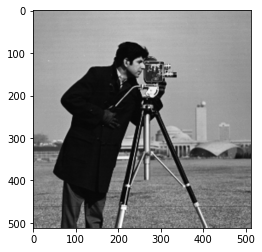

In [ ]:
cameraman = data.camera()
print("Dimensions of the image are:", cameraman.shape)
plt.imshow(cameraman, cmap='gray')

In [ ]:
def binarize_img(im):
    '''
    Converts an image to it's binary form
    
    Arguments
    im: An nd-array of the image

    Returns
    bin_im: Binarized form of the image
    '''

    bin_im = im / 255.

    bin_im.flags.writeable = True
    bin_im[bin_im < 0.5] = 0
    bin_im[bin_im >= 0.5] = 1

    return bin_im

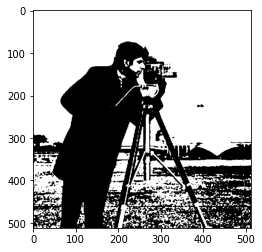

In [ ]:
bin_cameraman = binarize_img(cameraman)

plt.imshow(bin_cameraman, cmap='gray')

### Adding Noise

In [ ]:
def add_noise(orig_img, thresh=0.05):

    N, M = orig_img.shape
    noisy_img = orig_img.copy()
    noise = np.random.rand(N, M)
    noise[noise < 1-thresh] = 0
    noise[noise >= 1-thresh] = 1

    noisy_img = (noisy_img + noise) % 2
    
    return noisy_img

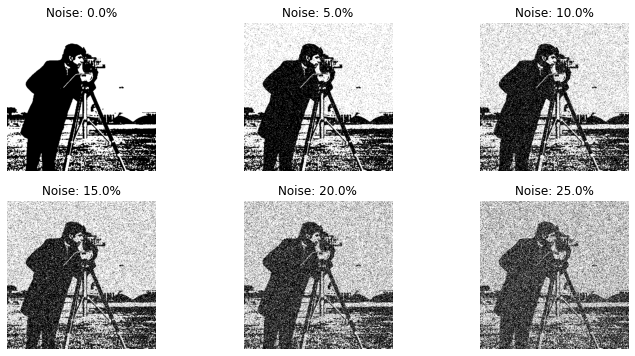

In [ ]:
fig = plt.figure(figsize=(12, 6))

for i in range(0, 5 + 1):
    thresh = i/20
    noisy_img = add_noise(bin_cameraman, thresh)
    plt.subplot(2, 3, i+1)
    plt.title(f'Noise: {thresh*100}%')
    plt.axis('off')
    plt.imshow(noisy_img, cmap='gray')
plt.show()

### Denoising the image

In [ ]:
def get_neighbours(i, j, M, N):
    neighbours = []
    if i > 0:
        neighbours.append([i-1, j])
    if i < M-1:
        neighbours.append([i+1, j])
    if j > 0:
        neighbours.append([i, j-1])
    if j < N-1:
        neighbours.append([i, j+1])

    return neighbours

In [ ]:
def enrg(new, old, y, neighbours):
    lmda = -100
    return (new - old)**2 + lmda * np.sum((new - y[neighbour[0], neighbour[1]])**2 for neighbour in neighbours)

In [ ]:
def diff(y, y_old):
    diff = abs(y - y_old) / 2
    return (100.0 * np.sum(diff)) / np.size(y)

In [ ]:
def denoise(noisy_img):
    M, N = noisy_img.shape
    y = noisy_img.copy()
    maxiter = 5*M*N

    for iter in range(maxiter):
        i = np.random.randint(M)
        j = np.random.randint(N)
        neighbours = get_neighbours(i, j, M, N)

        enrg_1 = enrg(1, y[i, j], y, neighbours)
        enrg_0 = enrg(0, y[i, j], y, neighbours)

        if enrg_1 > enrg_0:
            y[i, j] = 1
        else:
            y[i, j] = 0
        
        if iter % 100000 == 0:
            print (f'Completed {iter} iterations out of {maxiter}. Denoized pixels are: {diff(y, noisy_img)}%')

    return y

## Testing

Denoising for noise level: 5.0
Completed 0 iterations out of 1310720. Denoized pixels are: 0.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Completed 100000 iterations out of 1310720. Denoized pixels are: 1.5943527221679688%
Completed 200000 iterations out of 1310720. Denoized pixels are: 2.490997314453125%
Completed 300000 iterations out of 1310720. Denoized pixels are: 3.0681610107421875%
Completed 400000 iterations out of 1310720. Denoized pixels are: 3.4612655639648438%
Completed 500000 iterations out of 1310720. Denoized pixels are: 3.7405014038085938%
Completed 600000 iterations out of 1310720. Denoized pixels are: 3.9594650268554688%
Completed 700000 iterations out of 1310720. Denoized pixels are: 4.1290283203125%
Completed 800000 iterations out of 1310720. Denoized pixels are: 4.2865753173828125%
Completed 900000 iterations out of 1310720. Denoized pixels are: 4.3865203857421875%
Completed 1000000 iterations out of 1310720. Denoized pixels are: 4.464530944824219%
Completed 1100000 iterations out of 1310720. Denoized pixels are: 4.552268981933594%
Completed 1200000 iterations out of 1310720. Denoized pixels are: 4.6

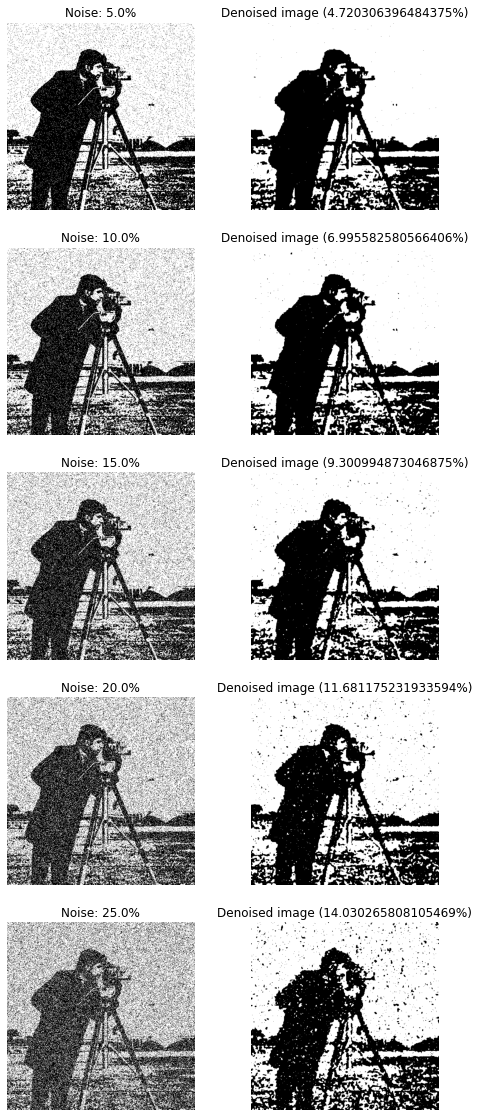

In [ ]:
fig = plt.figure(figsize=(8, 20))

for i in range(1, 5 + 1):
    thresh = i/20
    print(f"Denoising for noise level: {thresh*100}")

    noisy_img = add_noise(bin_cameraman, thresh)
    denoised_img = denoise(noisy_img)

    plt.subplot(5, 2, 2*i-1)
    plt.title(f'Noise: {thresh*100}%')
    plt.axis('off')
    plt.imshow(noisy_img, cmap='gray')

    plt.subplot(5, 2, 2*i)
    plt.title(f'Denoised image ({diff(noisy_img, denoised_img)}%)')
    plt.axis('off')
    plt.imshow(denoised_img, cmap='gray')

    print()
plt.show()

## Part B

I changed the hopfield.m codes to Python to do all the computations here

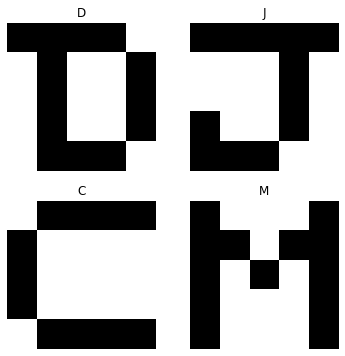

In [ ]:
# Patterns to store

D = np.array([-1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1]).reshape(5,5)
J = np.array([-1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1]).reshape(5,5)
C = np.array([1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1]).reshape(5,5)
M = np.array([-1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1]).reshape(5,5)

X = np.array([D, J, C, M])

letters = ['D', 'J', 'C', 'M']

fig = plt.figure(figsize=(6, 6))

for idx, letter in enumerate(X):
    plt.subplot(2, 2, idx+1)
    plt.title(letters[idx])
    plt.axis('off')
    plt.imshow(letter, cmap='gray')
plt.show()

In [ ]:
# Learn the weights according to Hebb's rule

n = X.shape[0]
m = X.shape[1] * X.shape[2]

W = np.zeros((m,m));

for i in range(n):
	W += X[i, :].reshape(-1, 1) @  X[i, :].reshape(1, -1)


np.fill_diagonal(W, 0)

W /= n

In [ ]:
def add_error(num_errors=1):
    chosen_letter = random.choice(X)
    letter_with_err = chosen_letter.copy()
    errors = []
    while num_errors:
        i = np.random.randint(5)
        j = np.random.randint(5)

        if (i, j) not in errors:
            errors.append((i, j))
            letter_with_err[i, j] = -letter_with_err[i, j]
            num_errors -= 1

    return chosen_letter, letter_with_err

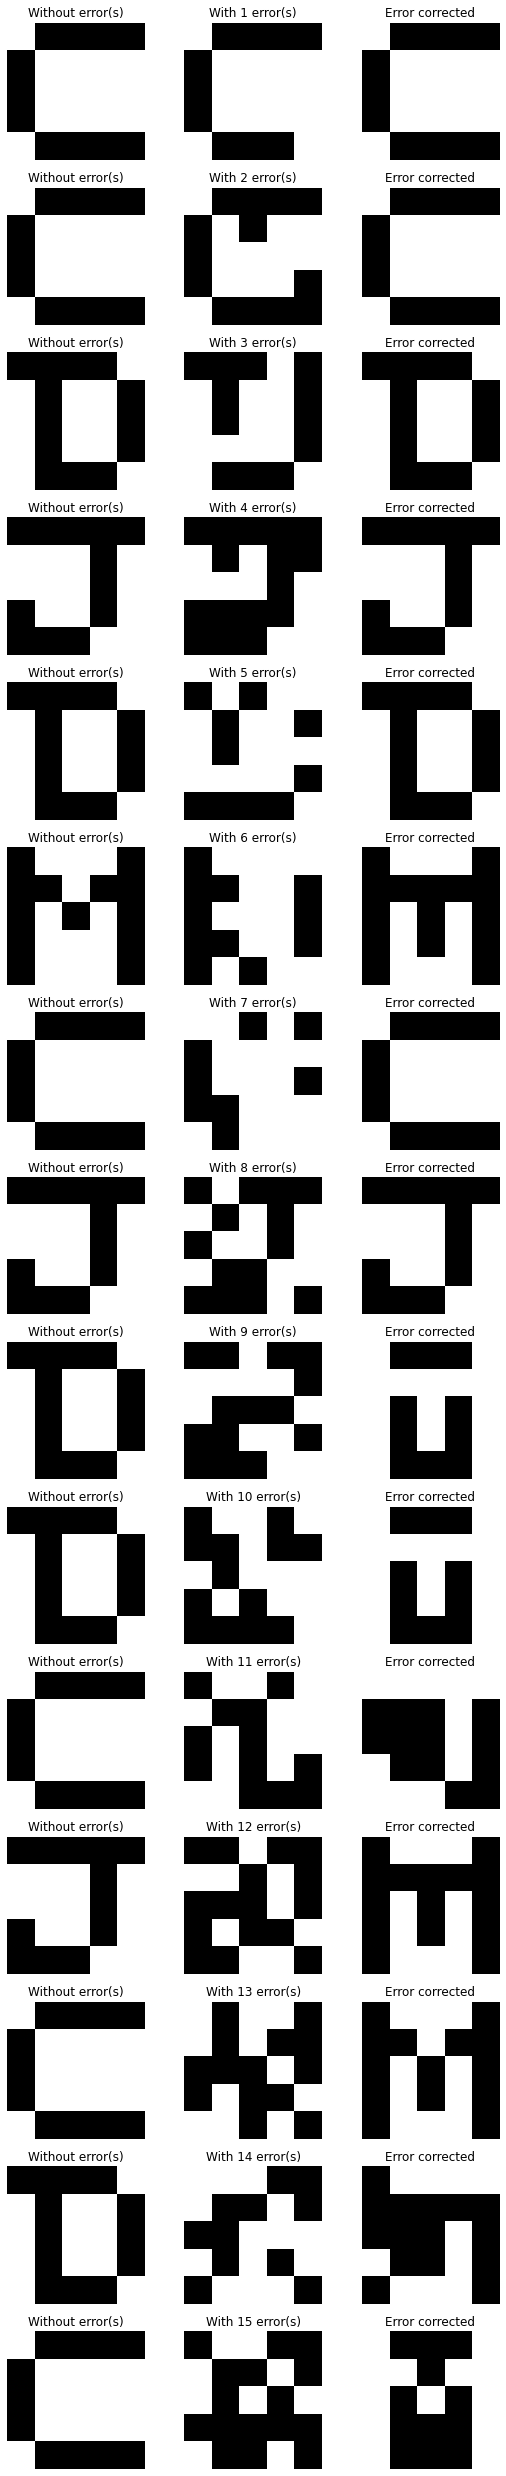

In [ ]:
# Removing errors

fig = plt.figure(figsize=(9, 45))

for i in range(1, 15 + 1):
    chosen_letter, letter_with_err = add_error(i)

    y = letter_with_err.reshape(-1)

    last_erry = i
    erry = 26
    while erry != last_erry:
        last_erry = erry
        yp = np.sign(W @ y)
        erry = np.linalg.norm(yp - y)
        y = yp
    
    plt.subplot(15, 3, 3*(i-1)+1)
    plt.title('Without error(s)')
    plt.axis('off')
    plt.imshow(chosen_letter, cmap='gray')
    plt.subplot(15, 3, 3*(i-1)+2)
    plt.title(f'With {i} error(s)')
    plt.axis('off')
    plt.imshow(c, cmap='gray')
    plt.imshow(letter_with_err, cmap='gray')
    plt.subplot(15, 3, 3*(i-1)+3)
    plt.title('Error corrected')
    plt.axis('off')
    plt.imshow(y.reshape(5,5), cmap='gray')
plt.show()

## Part C

In [ ]:
# Number of cities
N = 10

city_x = np.random.rand((10))
city_y = np.random.rand((10))

print('The co-ordinates of the 10 cities are:')
for city in zip(city_x, city_y):
    print(city)

The co-ordinates of the 10 cities are:
(0.9924405411547147, 0.15647784627175088)
(0.202835583500371, 0.1085769711761505)
(0.6462742198095113, 0.3035982496090196)
(0.4374537258732456, 0.7061595523351535)
(0.773713755034326, 0.5399990134525362)
(0.9445474735804534, 0.7623376380849011)
(0.728210144449313, 0.612426032279725)
(0.5734956791302863, 0.7372067379708782)
(0.25356498045933595, 0.8736280527111618)
(0.005059754756339463, 0.2900971258687215)


Text(0.5, 1.0, 'Map of cities')

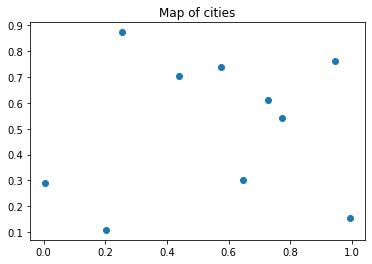

In [ ]:
plt.plot(city_x, city_y, 'o')
plt.title('Map of cities')

In [ ]:
d = np.zeros((N,N))
# Calculate distance matrix
for i in range(N):
    for j in range(N):
        d[i, j] = np.sqrt((city_x[i] - city_x[j])**2 + (city_y[i] - city_y[j])**2)

In [ ]:
# Set parameters for network energy function
A = 500
B = 500
C = 1000
D = 500
alpha = 0.0001

In [ ]:
# x-v-value of each node, y-u-input potential, u0-gamma
def hopfield():
    u0 = 0.02
    toend = 0
    udao = np.zeros((N, N))
    ctr = 0
    while toend == 0:
        ctr += 1
        # U initialization
        v = np.random.rand(N,N)
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)

        u += u*0.91
        for _ in range(1000):
            for vx in range(N):
                for vi in range(N):
                    j1, j2, j3, j4 = 0, 0, 0, 0

                    # derivative 1 (sum over columns j!=vi)
                    for j in range(N):
                        if j != vi:
                            j1 += v[vx, j]
                    j1 *= -A

                    # derivative 2 (sum over rows y!=x)
                    for y in range(N):
                        if y != vx:
                            j2 += v[y, vi]
                    j2 *= -B

                    # derivative 3 (overall sum)
                    j3 = np.sum(v)
                    j3 = -C*(j3-N)

                    # derivative 4
                    for y in range(N):
                        if y != vx:
                            if vi == 0:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi == N-1:
                                j4 += d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4 *= -D
                    udao[vx, vi] = -u[vx, vi]+j1+j2+j3+j4

            # update status and derivatives
            u = u + alpha*udao

            # calculate node value from input potential u
            v = (1+np.tanh(u/u0)) / 2

            # threshold
            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi] < 0.7):
                        v[vx, vi] = 0
                    if(v[vx, vi] >= 0.7):
                        v[vx, vi]=1

        # testing whether solution is legal
        t1, t2, t3 = 0, 0, 0

        # require total of N-nodes with 1 value
        t1=0;
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]

        # allow only one node in each row equal 1
        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])

        # allow only one node in each column equal 1
        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])

        # stop the loop after getting the valid solution
        if t1 == N and t2 == 0 and t3 == 0:
            toend = 1
        else:
            toend = 0

    return(v, ctr)

In [ ]:
def total_distance(v):
    city_x_final = np.zeros((N+1))
    city_y_final = np.zeros((N+1))

    for j in range(N):
        for i in range(N):
            if v[i,j] == 1:
                city_x_final[j] = city_x[i]
                city_y_final[j] = city_y[i]

    city_x_final[N] = city_x_final[0]
    city_y_final[N] = city_y_final[0]

    # calculate the total distance
    td = 0
    for i in range(N-1):
        td += np.sqrt((city_x_final[i] - city_x_final[i+1])**2
                    + (city_y_final[i] - city_y_final[i+1])**2)
    td += np.sqrt((city_x_final[N-1] - city_x_final[0])**2
                + (city_y_final[N-1] - city_y_final[0])**2)
    
    return(td, city_x_final, city_y_final)

In [ ]:
v = np.zeros([N,N])

ct = 0

min_dist = 20
best_path = None

for i in range(20):
    v, steps = hopfield()
    td, _, _ = total_distance(v)
    print(f"Epoch {i}: Ran for {steps} steps, total distance {td}")
    if td < min_dist:
        min_dist = td
        best_path = v


Epoch 0: Ran for 13 steps, total distance 3.826292652860694
Epoch 1: Ran for 15 steps, total distance 3.4980290740482665
Epoch 2: Ran for 18 steps, total distance 3.8642392509508525
Epoch 3: Ran for 3 steps, total distance 3.67844452769649
Epoch 4: Ran for 7 steps, total distance 3.821612884252352
Epoch 5: Ran for 5 steps, total distance 3.812122220185741
Epoch 6: Ran for 13 steps, total distance 3.469056557028831
Epoch 7: Ran for 10 steps, total distance 3.335374174779629
Epoch 8: Ran for 24 steps, total distance 3.3239483512473647
Epoch 9: Ran for 60 steps, total distance 3.3239483512473647
Epoch 10: Ran for 14 steps, total distance 3.624791019632731
Epoch 11: Ran for 29 steps, total distance 3.6431372798297326
Epoch 12: Ran for 15 steps, total distance 4.0087310582148765
Epoch 13: Ran for 23 steps, total distance 3.961041048468791
Epoch 14: Ran for 2 steps, total distance 3.335374174779629
Epoch 15: Ran for 12 steps, total distance 3.5700090104803155
Epoch 16: Ran for 17 steps, tota

In [ ]:

def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + ' -> '
    return (route + str(np.argmax(v[:, 0])))

In [ ]:
print(get_route(best_path))

3 -> 8 -> 9 -> 1 -> 2 -> 0 -> 5 -> 4 -> 6 -> 7 -> 3


In [ ]:
indices = [3, 8, 9, 1, 2, 0, 5, 4, 6, 7, 3]

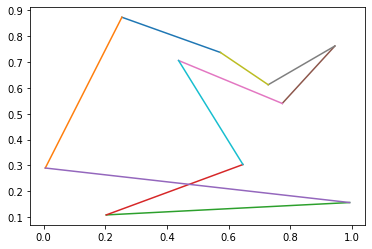

In [ ]:
for i in indices[1:]:
    plt.plot([city_x[i], city_x[i-1]], [city_y[i], city_y[i-1]], '-')
plt.show()